In [18]:
%load_ext autoreload
%autoreload 2
import data
import data_prepro as pre 
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import scienceplots
from pathlib import Path
import portfolio_trade as pt
from py.result_sect import ReturnAnalyzer


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df = data.load_process()

In [ ]:
!pwd

In [ ]:
%cd ..

In [ ]:
data_dir = Path.cwd()/'data'

df_dict = {
    file.stem.replace("sector_","") : pd.read_parquet(file)
    for file in data_dir.glob("sector_*.parquet")
}

In [ ]:
df_dict['10']

In [7]:
sp500ret = pd.read_csv('/Users/minhquangngo/documents/vsc/erasmus/msc_thesis/data/sp500daily_ret_2018.csv')

In [8]:
sp500ret = sp500ret.iloc[:-1, :]
sp500ret.shape

(250, 2)

In [ ]:
sp500ret.shape

In [10]:
sp500ret.index = pd.to_datetime(sp500ret['DlyCalDt'])
sp500ret = sp500ret.drop(columns=['DlyCalDt'])
sp500ret.head()

,sprtrn
DlyCalDt,
2018-01-02,0.008303
2018-01-03,0.006399
2018-01-04,0.004029
2018-01-05,0.007034
2018-01-08,0.001662


In [ ]:
weighted_portfolio_returns = pt.weighted_portfolio_returns(weight_mode = 'unconstrained')._weighted_portfolios()

In [23]:
weighted_portfolio_returns

([0.00613479173126815,
  0.006479194226202992,
  -0.007963565619372108,
  0.004538234270950176,
  0.009479231939173787,
  -0.00588348749122703,
  -0.007771682892000278,
  0.009213715061623766,
  0.00772047359646732,
  0.002808704873240304,
  0.008514483175255218,
  -0.0026190427902212533,
  0.0035228412139791192,
  0.01240943927646286,
  0.006100761629093044,
  -0.0019109739699552505,
  0.00622850315104463,
  0.012290613919479183,
  -0.011519512518745499,
  -0.006472258642775043,
  -0.0008135896249972381,
  -0.0036967791691296242,
  -0.02441070095569719,
  -0.03733595155782604,
  0.016599408951694337,
  -0.005475537727675439,
  -0.03384633986531681,
  0.023084946940274235,
  0.007968838198050342,
  0.0024956908979638904,
  0.010003873697027103,
  0.011790254991121045,
  0.001138369073506076,
  -0.0071052903481296035,
  -0.00720483990542832,
  0.0034586206143332214,
  0.01681003093386819,
  0.009014872837577173,
  -0.00969358442482926,
  -0.011301305818178113,
  -0.01199386022363252,
  

In [ ]:
# Create a DataFrame from weighted_portfolio_returns tuple
weighted_portfolio_df = pd.DataFrame({
    f'portfolio_{i+1}': arr for i, arr in enumerate(weighted_portfolio_returns)
})

# Align the index with sp500ret
weighted_portfolio_df.index = sp500ret.index[:len(weighted_portfolio_df)]

# Join with sp500ret DataFrame
combined_df = sp500ret.join(weighted_portfolio_df)

combined_df.head()

In [ ]:
combined_df.plot(figsize=(12, 6), title="Combined DataFrame Columns", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc='best')
plt.show()

In [ ]:
# Calculate cumulative returns of 'sprtrn'
combined_df['sprtrn_cumret'] = (1 + combined_df['sprtrn']).cumprod() - 1
combined_df[['sprtrn', 'sprtrn_cumret']].head()

# Get cumulative return at the end of the year as a percentage
end_of_year_cumret = combined_df['sprtrn_cumret'].iloc[-1] * 100
print(f"Cumulative return at end of year: {end_of_year_cumret:.2f}%")

In [ ]:
# Calculate cumulative returns for all 4 portfolios
for col in ['portfolio_1', 'portfolio_2', 'portfolio_3', 'portfolio_4']:
    combined_df[f'{col}_cumret'] = (1 + combined_df[col]).cumprod() - 1

# Display the last cumulative return value for each portfolio
for col in ['portfolio_1', 'portfolio_2', 'portfolio_3', 'portfolio_4']:
    cumret = combined_df[f'{col}_cumret'].iloc[-2] * 100  # use -2 because last row is NaN
    print(f"Cumulative return for {col}: {cumret:.2f}%")

In [25]:
%cd py

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/py


/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/py/returns_analysis.py:159: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats = stats.applymap(lambda x: round(x, 4))  # 4 decimal precision


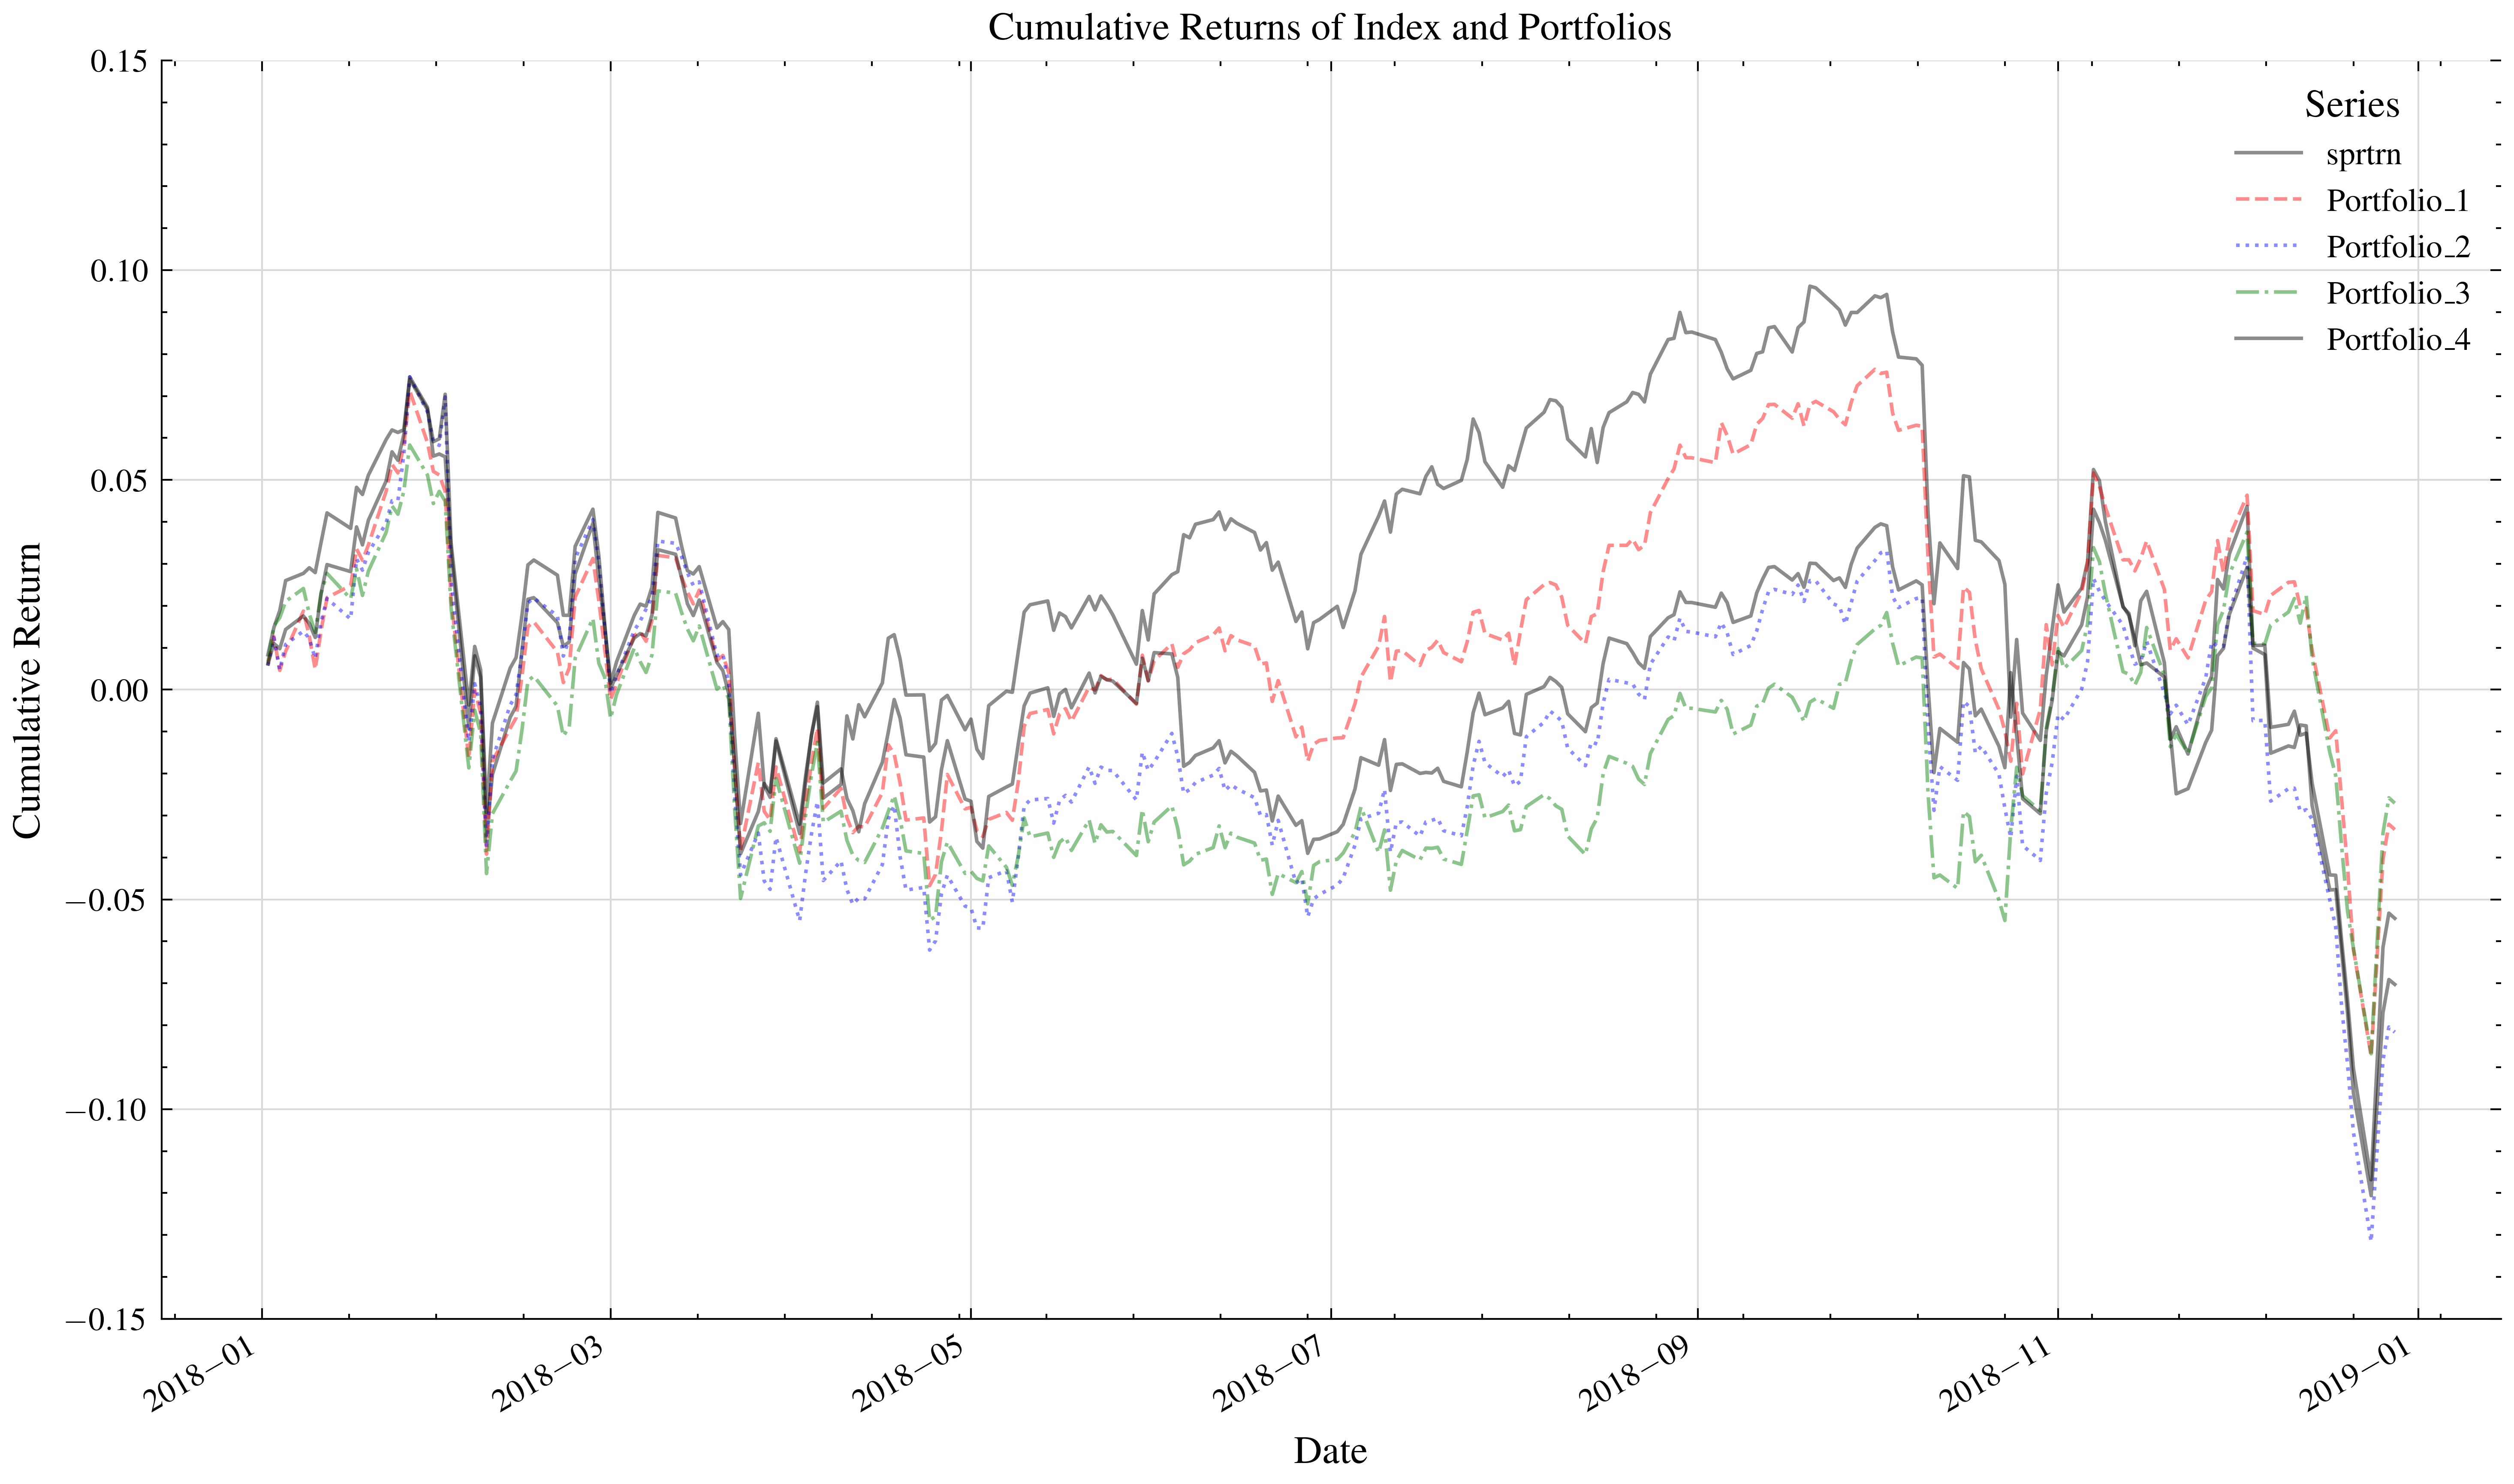

In [26]:
from py.returns_analysis import ReturnAnalyzer

an = ReturnAnalyzer(sp500ret, weighted_portfolio_returns)
latex = an.generate_apa_latex_table()   # -> copy into your LaTeX doc
fig   = an.plot_returns()               # -> save/show as needed

In [27]:
latex

'\n% \\usepackage{booktabs} must be included in the preamble.\n\\begin{table}[ht]\n    \\centering\n    % Table number and title (APA) -----------------------------------------\n    \\textbf{Table 1}\\\\[12pt]\n    \\textit{Descriptive Statistics of Index and Portfolio Returns}\\\\[6pt]\n    % ----------------------------------------------------------------------\n    \\begin{tabular}{lcccc}\n        \\toprule\n        {} & Cumulative return & Annualised return & Annualised volatility & Alpha \\\\\n        \\midrule\n        sprtrn & -7.03% & -7.08% & 17.06% & 0.00% \\\\\nPortfolio_1 & -3.34% & -3.36% & 15.81% & 3.72% \\\\\nPortfolio_2 & -8.16% & -8.23% & 16.31% & -1.15% \\\\\nPortfolio_3 & -2.71% & -2.73% & 15.67% & 4.35% \\\\\nPortfolio_4 & -5.45% & -5.49% & 16.24% & 1.59% \\\\\n        \\\\\n        \\bottomrule\n    \\end{tabular}\n    \\label{tab:return_stats_1}\n\\end{table}'